# Tweeting Habits During the Understanding Period

In [1]:
from datetime import datetime

import json
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys

event = '#WATARS'

cwd = os.path.dirname(os.path.realpath('__file__'))
data = os.path.join(cwd, '..', '..', '..', 'data')
event_dir = os.path.join(data, event)

In [2]:
"""
Read the meta data.
"""

with open(os.path.join(event_dir, 'understanding.meta.json'), 'r') as meta_file:
    meta = json.loads(meta_file.readline())
    collection_start = datetime.fromtimestamp(meta['start'])
    collection_end = datetime.fromtimestamp(meta['end'])
    print(f"Understanding corpus collected between { collection_start.strftime('%Y-%m-%d %H:%M:%S') } and { collection_end.strftime('%Y-%m-%d %H:%M:%S') }")
    print(f"{event} tracked using keywords: { ', '.join(meta['keywords']) }")

Understanding corpus collected between 2019-09-15 16:15:00 and 2019-09-15 17:15:01
#WATARS tracked using keywords: #WATARS, Watford, Arsenal


In [3]:
"""
Profile the event.
"""

bins = {}
with open(os.path.join(event_dir, 'understanding.json'), 'r') as corpus:
    for line in corpus:
        line = json.loads(line)
        timestamp = float(line['timestamp_ms']) / 1e3
        minute = datetime.fromtimestamp(timestamp - timestamp % 60)
        bins[minute] = bins.get(minute, 0) + 1

In [4]:
data = sorted(bins.items(), key = lambda bin: bin[0])
df = pd.DataFrame(data)
df.columns = [ 'minute', 'volume' ]
df.drop(df.index[0], inplace=True)
df.reset_index(inplace=True)
df.head()

,index,minute,volume
0,1,2019-09-15 16:15:00,121
1,2,2019-09-15 16:16:00,135
2,3,2019-09-15 16:17:00,107
3,4,2019-09-15 16:18:00,136
4,5,2019-09-15 16:19:00,138


In [5]:
max_minute = df[df['volume'] == max(df['volume'])]
max_minute

,index,minute,volume
16,17,2019-09-15 16:31:00,1235


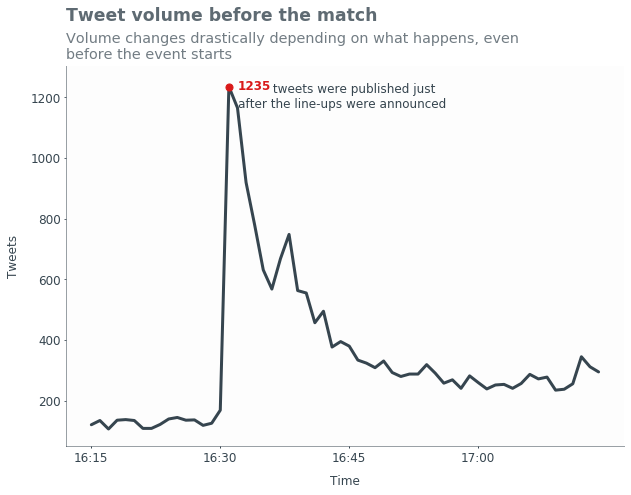

In [10]:
plt.style.use(os.path.join(sys.path[0], "../fire.style"))
plt.style.reload_library()

plt.figure(figsize=(10,7))

plt.xlabel('Time')
plt.ylabel('Tweets')

"""
Instead of adding a legend, add a text at the end of the time series.
"""
plt.plot(range(len(df)), df['volume'], color='C3', label='Time Series')

xticks = list(range(0, len(df), 15))
xtick_labels = [ minute.strftime('%H:%M') 
                for i, minute in enumerate(df['minute']) 
                if i in xticks ]
plt.xticks(xticks, xtick_labels)

plt.scatter(16, df['volume'].iloc[16], s=50, zorder=10)
plt.text(max_minute['index'] + 0.05, max_minute['volume'] - 10,
         str(max_minute.iloc[0]['volume']),
         fontweight=600, color='C0')
plt.text(max_minute['index'] + 0.05, max_minute['volume'] + 13.6,
         '         tweets were published just\nafter the line-ups were announced',
         color='C3', verticalalignment='top')

plt.title('Tweet volume before the match', loc='left', fontweight='bold', alpha=0.8, pad=45)
ax = plt.gca()
plt.text(0, 1.01, 'Volume changes drastically depending on what happens, even\nbefore the event starts',
         fontsize='large', alpha=0.7,
         horizontalalignment='left', verticalalignment='bottom',
         transform=ax.transAxes)
plt.show()